<a href="https://colab.research.google.com/github/ingridcos/exercicios-praticos/blob/main/Projeto_Storytelling_PARTE_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PROPOSTA

Somos uma empresa de delivery analisando a satisfação dos clientes nas principais capitais brasileiras. O objetivo é entender como o tempo médio de entrega se relaciona com a nota de satisfação e o volume de entregas em cada cidade, para apoiar decisões que melhorem o NPS.

## Cenário proposto

Você é analista de dados em uma empresa de delivery e precisa identificar fatores que influenciam a satisfação dos clientes nas principais cidades brasileiras.  
O objetivo é entender como o tempo médio de entrega e o volume de entregas se relacionam com a satisfação (nota de 0 a 10), para sugerir ações que melhorem o NPS da empresa.  

Neste notebook, vamos analisar os dados de cinco cidades (São Paulo, Rio de Janeiro, Belo Horizonte, Curitiba e Salvador), explorando:
- Tempo médio de entrega (minutos)
- Satisfação média dos clientes
- Número de entregas no mês

A partir dessa análise, vamos extrair um insight principal e propor recomendações para as operações/logística.


#TABELA ABAIXO:

In [ ]:
import pandas as pd

# Tabela do exercício
dados = {
    "Cidade": ["São Paulo", "Rio de Janeiro", "Belo Horizonte", "Curitiba", "Salvador"],
    "Tempo Médio de Entrega (min)": [45, 39, 33, 29, 50],
    "Satisfação Média (0-10)": [6.8, 7.4, 8.1, 8.3, 6.2],
    "Nº de Entregas no Mês": [1200, 950, 800, 700, 1000]
}

df = pd.DataFrame(dados)
df


,Cidade,Tempo Médio de Entrega (min),Satisfação Média (0-10),Nº de Entregas no Mês
0,São Paulo,45,6.8,1200
1,Rio de Janeiro,39,7.4,950
2,Belo Horizonte,33,8.1,800
3,Curitiba,29,8.3,700
4,Salvador,50,6.2,1000


In [ ]:
import matplotlib.pyplot as plt

tabela_final = pd.DataFrame({
    "cidade": ["Salvador", "São Paulo", "Rio de Janeiro", "Curitiba", "Belo Horizonte"],
    "estado": ["BA", "SP", "RJ", "PR", "MG"],
    "tempo_medio_entrega_min": [50, 45, 39, 29, 33],
    "distancia_media_km": [10.1, 9.5, 8.2, 6.0, 6.8],
    "indice_risco_urbano": [5, 4, 4, 2, 2],
    "volume_entregas": [1000, 1200, 950, 700, 800],
    "satisfacao_media": [6.2, 6.8, 7.4, 8.3, 8.1]
})


tabela_final.to_csv('tabela_delivery_final.csv', index=False)
print("✅ Arquivo CSV salvo: tabela_delivery_final.csv")
tabela_final

✅ Arquivo CSV salvo: tabela_delivery_final.csv


,cidade,estado,tempo_medio_entrega_min,distancia_media_km,indice_risco_urbano,volume_entregas,satisfacao_media
0,Salvador,BA,50,10.1,5,1000,6.2
1,São Paulo,SP,45,9.5,4,1200,6.8
2,Rio de Janeiro,RJ,39,8.2,4,950,7.4
3,Curitiba,PR,29,6.0,2,700,8.3
4,Belo Horizonte,MG,33,6.8,2,800,8.1


#Gráfico de Colunas - Distância Média das Entregas por Cidade

A distância média considera a extensão da cidade, trânsito e regiões mais distantes da região central da cidade

Salvador tem maior distância média de entregas (10.1 km) que SP (9.5 km) principalmente pela topografia acidentada (morros/vales) que força rotas mais longas e sinuosas, apesar de SP ser mais congestionada. Estudos Moovit mostram trajetos totais em Salvador ~56 min (incluindo caminhada extra por relevo), vs. SP mais plana/densa com hubs logísticos otimizados.

Fonte: https://g1.globo.com/ba/bahia/noticia/2021/01/26/estudo-mostra-que-moradores-de-salvador-perdem-quase-uma-hora-em-trajetos-feitos-em-transportes-publicos.ghtml

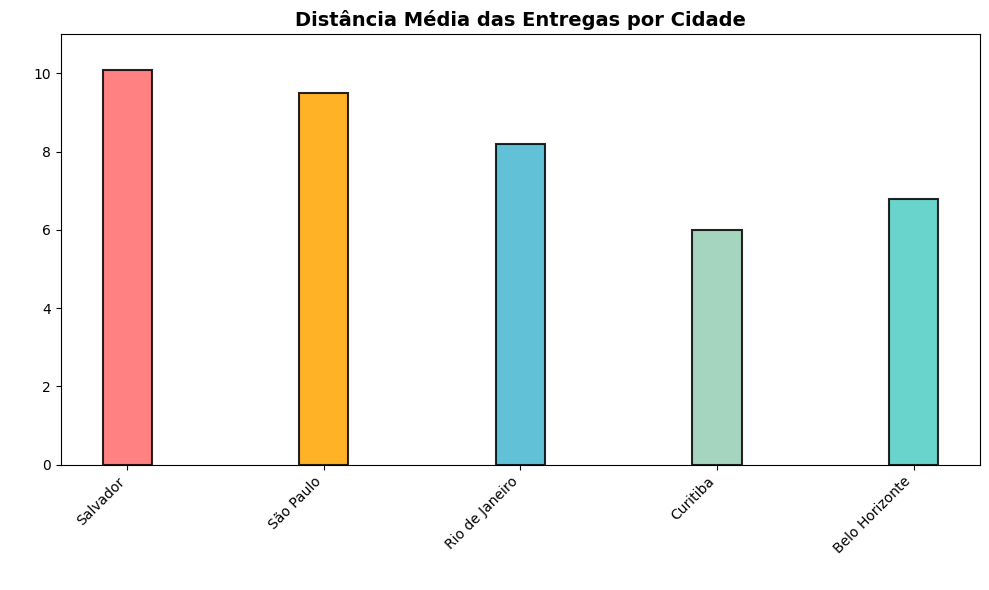

In [ ]:
df = pd.DataFrame({
    "Cidade": ["Salvador", "São Paulo", "Rio de Janeiro", "Curitiba", "Belo Horizonte"],
    "Distancia_Media_km": [10.1, 9.5, 8.2, 6.0, 6.8]
})

plt.figure(figsize=(10, 6))
plt.bar(df["Cidade"], df["Distancia_Media_km"], width=0.25,
        color=['#FF6B6B', '#FFA500', '#45B7D1', '#96CEB4', '#4ECDC4'],
        alpha=0.85, edgecolor='black', linewidth=1.5)
plt.xlabel(" ", fontweight='bold', fontsize=12)
plt.ylabel(" ", fontweight='bold', fontsize=12)
plt.title("Distância Média das Entregas por Cidade", fontweight='bold', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 11)
plt.grid(False)
plt.tight_layout()


plt.savefig("Distância Média das Entregas por Cidade.png", dpi=400, bbox_inches='tight')
plt.show()

#Gráfico de Colunas Horizontal

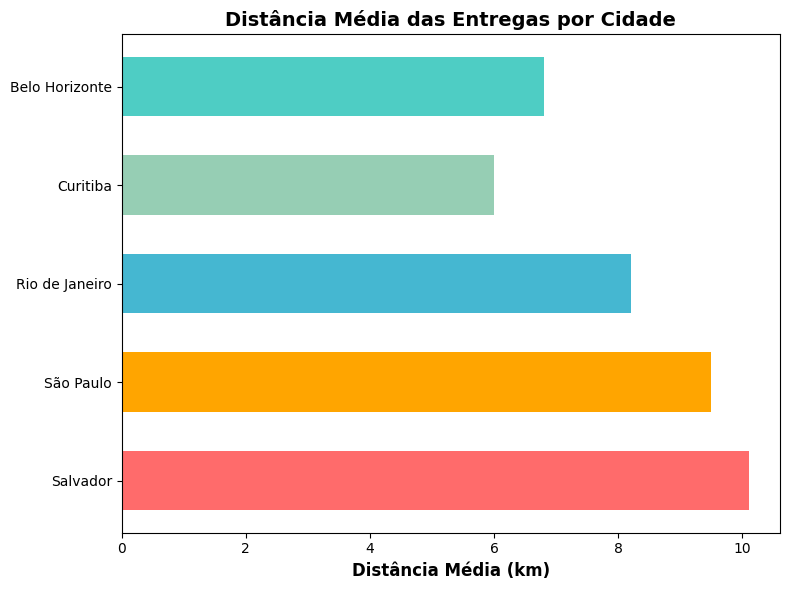

In [ ]:
plt.figure(figsize=(8, 6))
bars = plt.barh(df["Cidade"], df["Distancia_Media_km"],
                height=0.6, color=['#FF6B6B', '#FFA500', '#45B7D1', '#96CEB4', '#4ECDC4'])
plt.xlabel("Distância Média (km)", fontweight='bold', fontsize=12)
plt.title("Distância Média das Entregas por Cidade", fontweight='bold', fontsize=14)
plt.grid(False, axis='x')
plt.tight_layout()
plt.savefig("Distancia_Horizontal.png", dpi=400, bbox_inches='tight')
plt.show()

#Gráfico Scartterplot - Distância Média das Entregas por Cidade


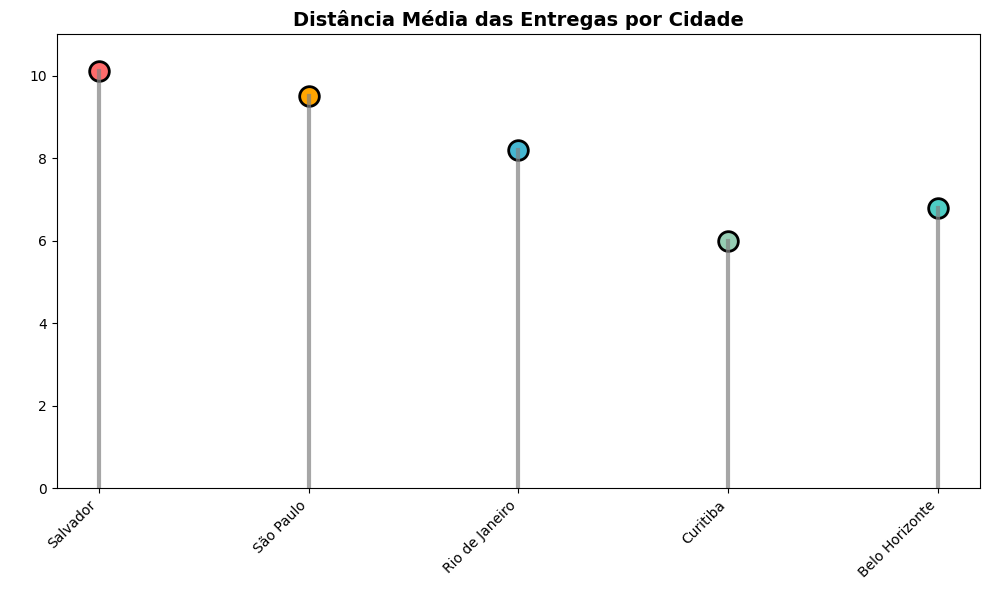

In [ ]:
plt.figure(figsize=(10, 6))
colors = ['#FF6B6B', '#FFA500', '#45B7D1', '#96CEB4', '#4ECDC4']
for i, (cidade, dist) in enumerate(zip(df["Cidade"], df["Distancia_Media_km"])): # df is available in kernel state
    plt.plot([i, i], [0, dist], color='gray', linewidth=3, alpha=0.7)
    plt.scatter(i, dist, s=200, c=colors[i],
                edgecolors='black', linewidth=2)
plt.xticks(range(len(df)), df["Cidade"], rotation=45, ha='right')
plt.ylabel(" ")
plt.title("Distância Média das Entregas por Cidade", fontweight='bold', fontsize=14)
plt.ylim(0, 11)
plt.grid(False, axis='y')
plt.tight_layout()
plt.savefig("Distancia_Lollipop.png", dpi=400, bbox_inches='tight')
plt.show()

#Gráfico de Colunas - Distância Média por Cidade & Risco Tempo

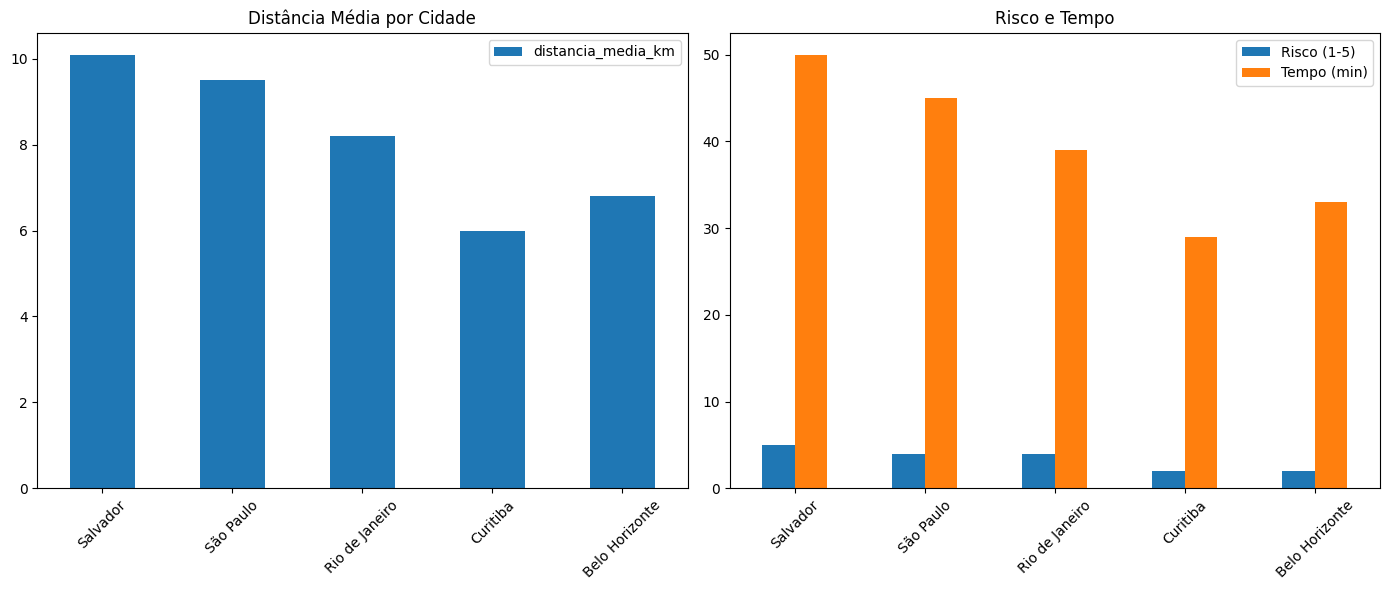

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

# Gráfico 1 - Distância
tabela_final.plot(x='cidade', y='distancia_media_km', kind='bar', ax=ax1, title='Distância Média por Cidade')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.tick_params(axis='x', rotation=45)

# Gráfico 2 - Risco e Tempo
tabela_final.plot(x='cidade', y=['indice_risco_urbano', 'tempo_medio_entrega_min'], kind='bar', ax=ax2, title='Risco e Tempo')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.legend(['Risco (1-5)', 'Tempo (min)'])
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('distancia_tempo.png', dpi=400, bbox_inches='tight')
plt.show()

#Gráfico de Linha e Coluna - Tempo Médio de Entrega X Risco Urbano

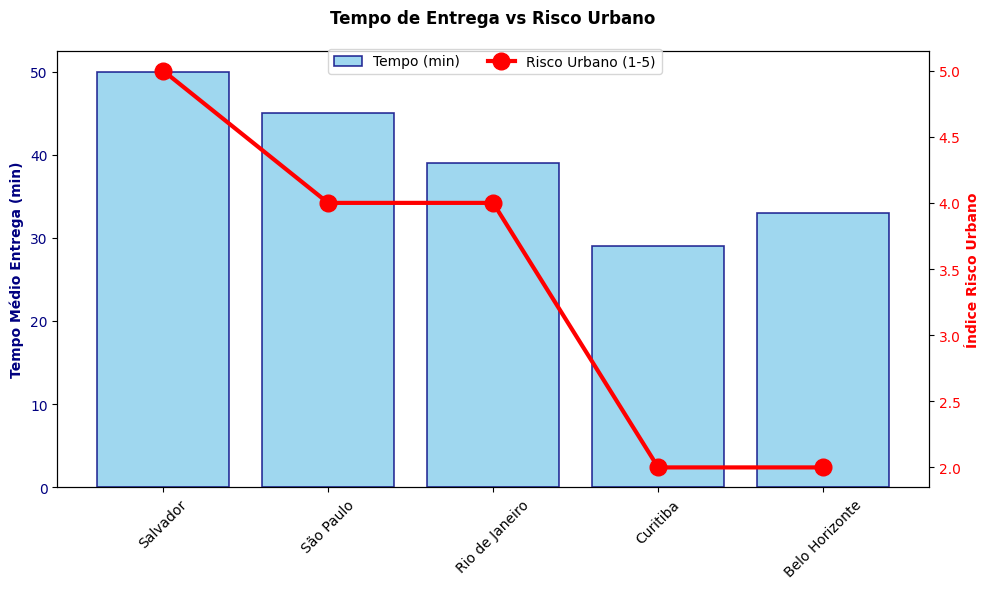

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Barras
bars = ax1.bar(tabela_final['cidade'], tabela_final['tempo_medio_entrega_min'],
               color='skyblue', alpha=0.8, edgecolor='navy', linewidth=1.2, label='Tempo (min)')
ax1.set_xlabel('')
ax1.set_ylabel('Tempo Médio Entrega (min)', color='navy', fontweight='bold')
ax1.tick_params(axis='y', labelcolor='navy')
ax1.tick_params(axis='x', rotation=45)

# Linha risco
ax2 = ax1.twinx()
ax2.plot(tabela_final['cidade'], tabela_final['indice_risco_urbano'],
         'ro-', markersize=12, linewidth=3, label='Risco Urbano (1-5)')
ax2.set_ylabel('Índice Risco Urbano', color='red', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='red')

title_obj = plt.title('Tempo de Entrega vs Risco Urbano', fontweight='bold', pad=20)
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.92), ncol=2)
plt.tight_layout()
plt.savefig('Tempo_de_entregas_vs_risco_urbano.png', dpi=400, bbox_inches='tight', facecolor='white')
plt.show()


#Heatmap - Riscos Urbanos X Cidades

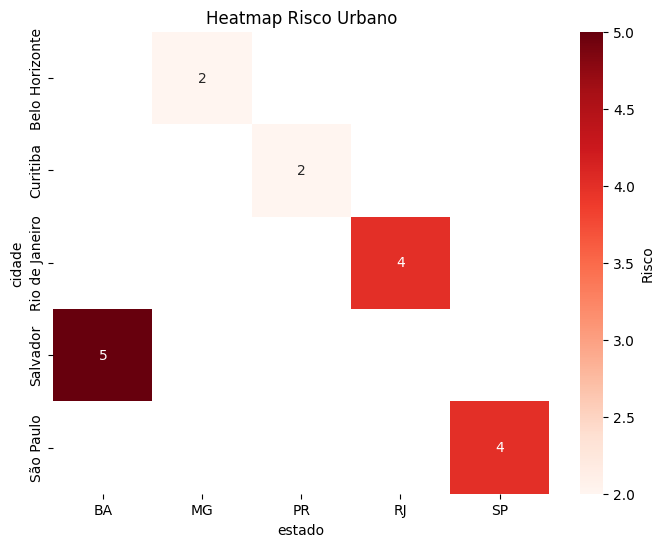

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(tabela_final.pivot_table(values='indice_risco_urbano', index='cidade', columns='estado'),
            annot=True, cmap='Reds', cbar_kws={'label': 'Risco'})
plt.title("Heatmap Risco Urbano")
plt.savefig("Heatmap_Risco.png", dpi=400)
plt.show()

#Gráfico de Coluna Horizontal - Risco Urbano por Cidade

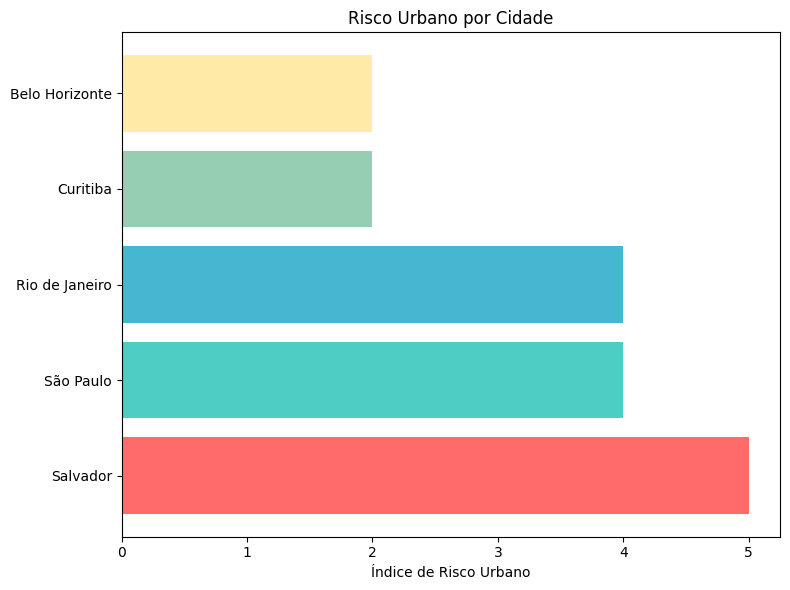

In [ ]:
plt.figure(figsize=(8, 6))
plt.barh(tabela_final["cidade"], tabela_final["indice_risco_urbano"],
         color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
plt.xlabel("Índice de Risco Urbano")
plt.title("Risco Urbano por Cidade")
plt.grid(False, axis='x')
plt.tight_layout()
plt.savefig("Risco_Horizontal.png", dpi=400)
plt.show()

#Gráfico ScartterPlot + Linha - Correlação Risco Urbano X Tempo Médio de Entregas

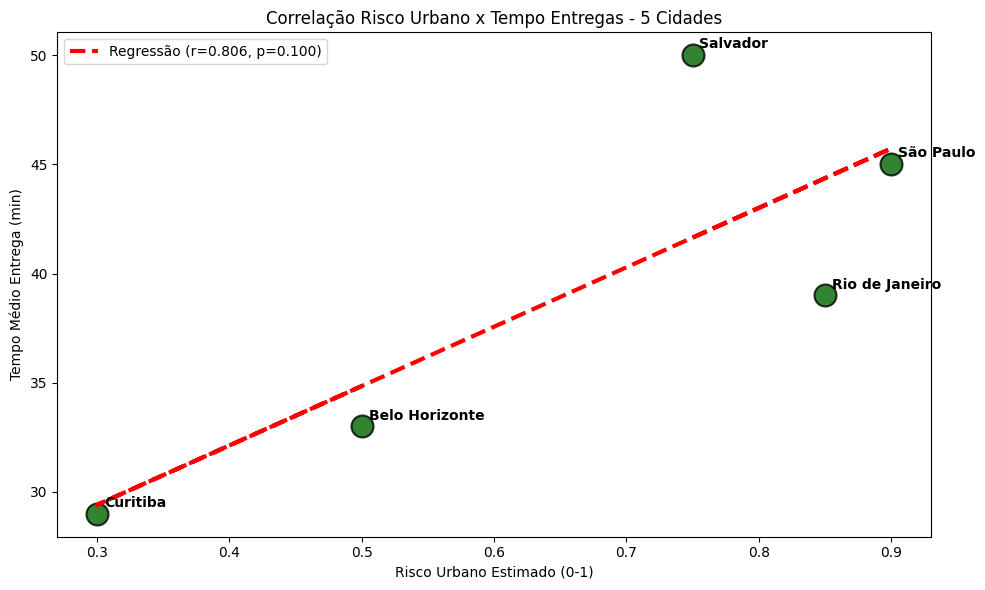

           Cidade Estado  Tempo_Medio_Entrega  Risco_Urbano
0        Salvador     BA                   50          0.75
1       São Paulo     SP                   45          0.90
2  Rio de Janeiro     RJ                   39          0.85
3        Curitiba     PR                   29          0.30
4  Belo Horizonte     MG                   33          0.50


In [ ]:
import numpy as np
from scipy.stats import pearsonr

df = pd.DataFrame({
    "Cidade": ["Salvador", "São Paulo", "Rio de Janeiro", "Curitiba", "Belo Horizonte"],
    "Estado": ["BA", "SP", "RJ", "PR", "MG"],
    "Tempo_Medio_Entrega": [50, 45, 39, 29, 33]
})

df['Risco_Urbano'] = [0.75, 0.90, 0.85, 0.30, 0.50]  # Estimados realistas

plt.figure(figsize=(10, 6))
plt.scatter(df['Risco_Urbano'], df['Tempo_Medio_Entrega'],
            s=250, c='darkgreen', alpha=0.8, edgecolors='black', linewidth=1.5)
z = np.polyfit(df['Risco_Urbano'], df['Tempo_Medio_Entrega'], 1)
p = np.poly1d(z)
r, pval = pearsonr(df['Risco_Urbano'], df['Tempo_Medio_Entrega'])
plt.plot(df['Risco_Urbano'], p(df['Risco_Urbano']),
         'r--', linewidth=3, label=f'Regressão (r={r:.3f}, p={pval:.3f})')
for i, row in df.iterrows():
    plt.annotate(row['Cidade'], (row['Risco_Urbano'], row['Tempo_Medio_Entrega']),
                 xytext=(5,5), textcoords='offset points', fontweight='bold')
plt.xlabel('Risco Urbano Estimado (0-1)')
plt.ylabel('Tempo Médio Entrega (min)')
plt.title('Correlação Risco Urbano x Tempo Entregas - 5 Cidades')
plt.legend()

plt.tight_layout()
plt.savefig('correlacao_todas_cidades.png', dpi=400)
plt.show()

print(df)

#Riscos urbanos apontados num gráfico de colunas horizontais

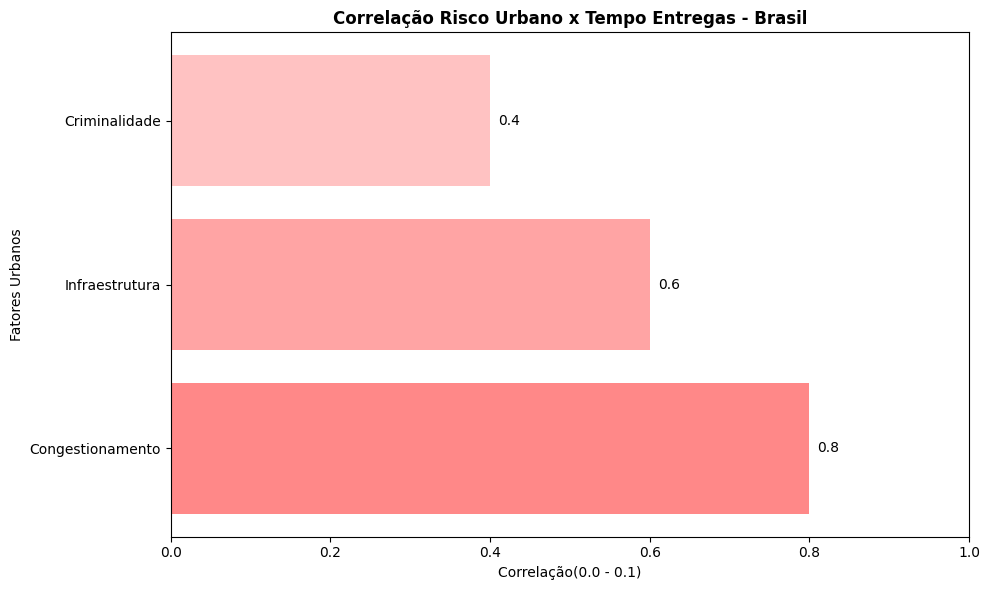

In [ ]:
fatores = ['Congestionamento', 'Infraestrutura', 'Criminalidade']
correlacoes = [0.8, 0.6, 0.4]  # Baseado em estudos logísticos BR

plt.figure(figsize=(10, 6))
bars = plt.barh(fatores, correlacoes, color=['#FF6B6B', '#FF8E8E', '#FFB3B3'], alpha=0.8)
plt.xlabel('Correlação(0.0 - 0.1)')
plt.ylabel('Fatores Urbanos')
plt.title('Correlação Risco Urbano x Tempo Entregas - Brasil', fontweight='bold')
plt.xlim(0, 1)

for bar, corr in zip(bars, correlacoes):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{corr:.1f}', va='center')
plt.tight_layout()
plt.show()

#Gráfico Scatterplot - Distância X Tempo

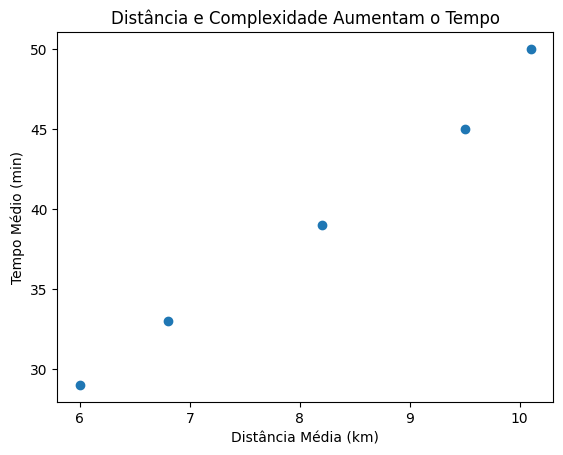

In [ ]:
plt.figure()
plt.scatter(tabela_final["distancia_media_km"], tabela_final["tempo_medio_entrega_min"])
plt.xlabel("Distância Média (km)")
plt.ylabel("Tempo Médio (min)")
plt.title("Distância e Complexidade Aumentam o Tempo")
plt.show()

#Gráfico de Colunas - Tempo Médio de Entregas nas Cidades Críticas - RJ, SP e Salvador

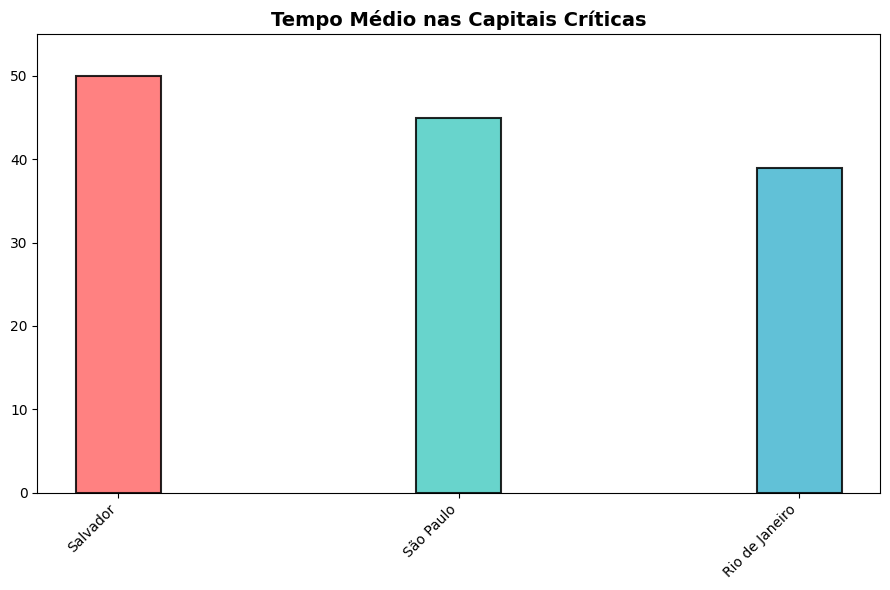

In [ ]:
df_completo = pd.DataFrame({
    "Cidade": ["Salvador", "São Paulo", "Rio de Janeiro", "Curitiba", "Belo Horizonte"],
    "Estado": ["BA", "SP", "RJ", "PR", "MG"],
    "Tempo_Medio_Entrega": [50, 45, 39, 29, 33]
})

# Criticas BA/SP/RJ
criticas = df_completo[df_completo["Estado"].isin(["BA", "SP", "RJ"])]

plt.figure(figsize=(9, 6))
plt.bar(criticas["Cidade"], criticas["Tempo_Medio_Entrega"], width=0.25,
        color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.85, edgecolor='black', linewidth=1.5)
plt.xlabel("")
plt.ylabel("")
plt.title("Tempo Médio nas Capitais Críticas", fontweight='bold', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 55)
plt.grid(False)
plt.tight_layout()
plt.savefig("Tempo_Criticas_Capitais.png", dpi=400, bbox_inches='tight')
plt.show()



#Gráfico de Gauge - Capitais Críticas

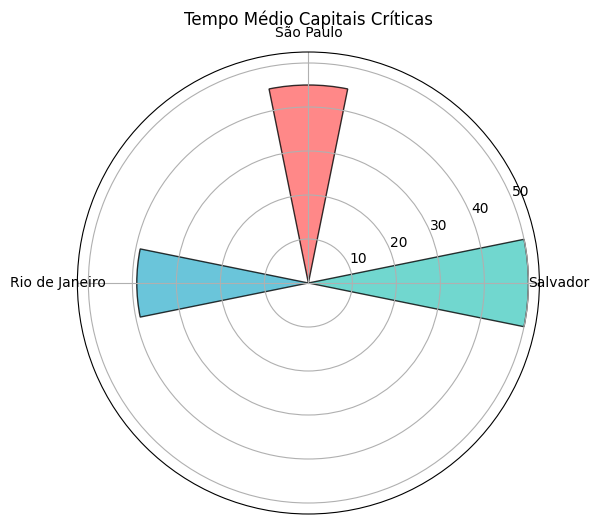

In [ ]:
import numpy as np

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(projection='polar'))
angles = np.linspace(0, np.pi, len(criticas))
ax.bar(angles, criticas["Tempo_Medio_Entrega"],
       width=0.4, color=['#4ECDC4', '#FF6B6B', '#45B7D1'],
       alpha=0.8, edgecolor='black')
ax.set_xticks(angles)
ax.set_xticklabels(criticas["Cidade"])
ax.set_title("Tempo Médio Capitais Críticas", pad=20)
plt.savefig("Tempo_CidadesCriticas_Gauge.png", dpi=400)
plt.show()

#Gráfico de Coluna - Benchmark - Capitais com bom alto nível de satisfação dos clientes

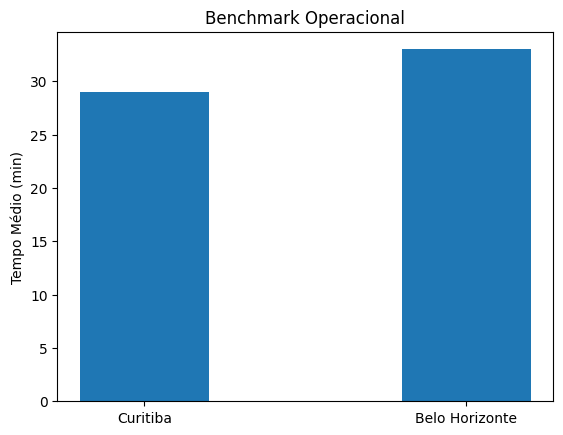

In [ ]:
df = pd.DataFrame({
    "Cidade": ["Salvador", "São Paulo", "Rio de Janeiro", "Curitiba", "Belo Horizonte"],
    "Estado": ["BA", "SP", "RJ", "PR", "MG"],
    "Tempo_Medio_Entrega": [50, 45, 39, 29, 33]
})

benchmark = df[df["Estado"].isin(["PR", "MG"])]

plt.figure()
plt.bar(benchmark["Cidade"], benchmark["Tempo_Medio_Entrega"], width=0.4)
plt.xlabel("")
plt.ylabel("Tempo Médio (min)")
plt.title("Benchmark Operacional")
plt.savefig("benchmark_cidadesmodelo.png", dpi=300)
plt.show()

#Gráfico Gauge - Cidades Modelos - Tempo Médio - Capitais com Melhores Entregas

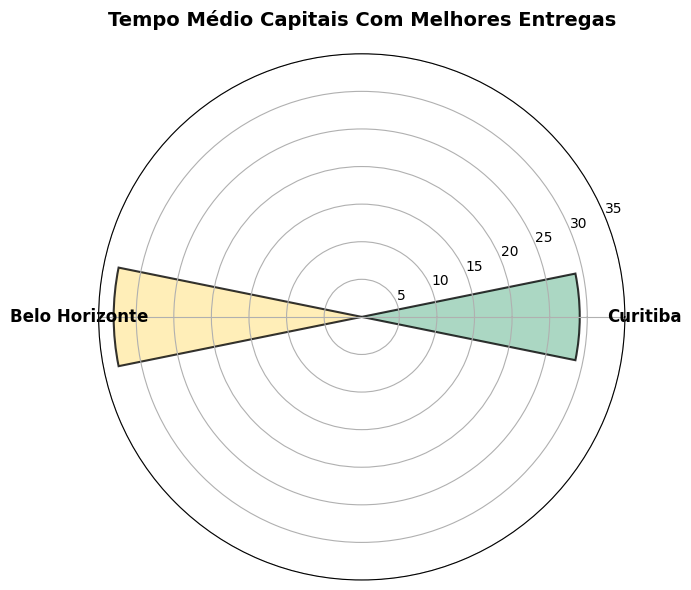

In [ ]:
criticas = pd.DataFrame({
    "Cidade": ["Curitiba", "Belo Horizonte"],
    "Tempo_Medio_Entrega": [29, 33]
})

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(projection='polar'))
angles = np.linspace(0, np.pi, len(criticas))
ax.bar(angles, criticas["Tempo_Medio_Entrega"],
       width=0.4, color=['#96CEB4', '#FFEAA7'],
       alpha=0.8, edgecolor='black', linewidth=1.5)
ax.set_xticks(angles)
ax.set_xticklabels(criticas["Cidade"], fontweight='bold', fontsize=12)
ax.set_title("Tempo Médio Capitais Com Melhores Entregas", pad=20, fontweight='bold', fontsize=14)
ax.set_ylim(0, 35)
plt.tight_layout()
plt.savefig("Tempo_medio_capitais_melhores_entregas_Gauge.png", dpi=400, facecolor='white')
plt.show()


#KPI Completo

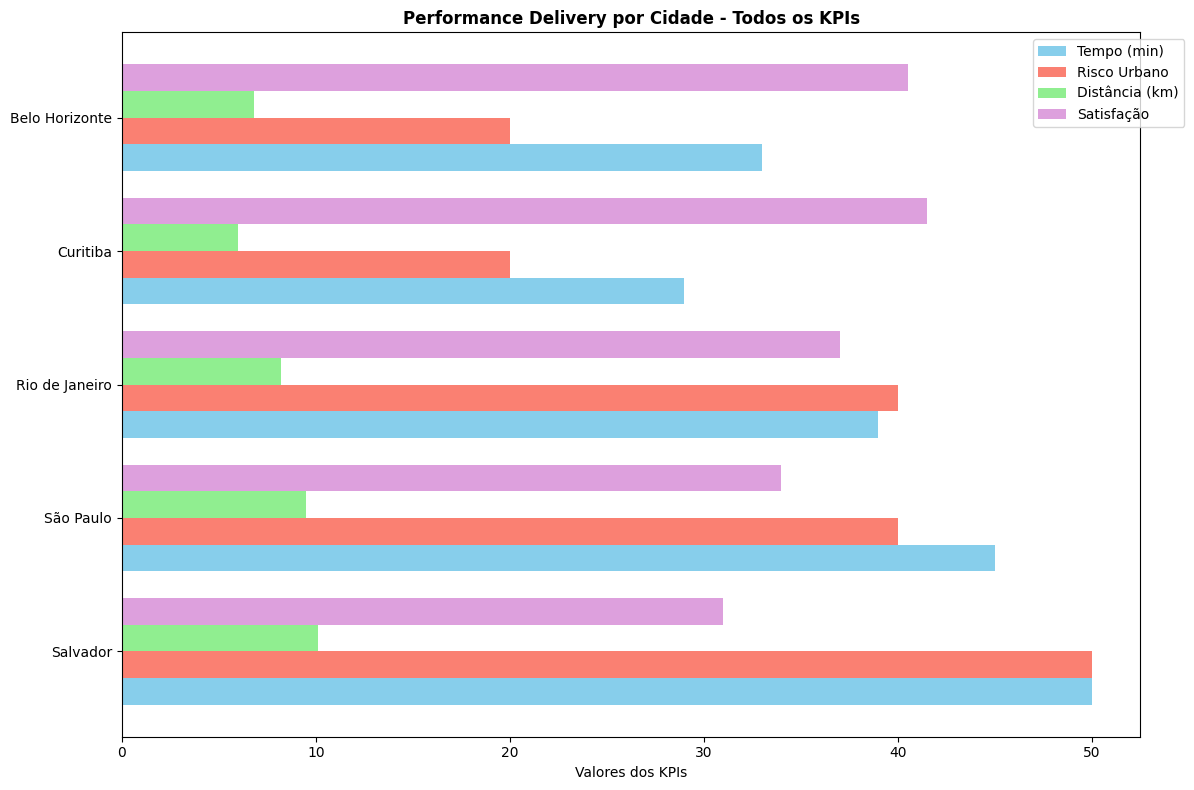

In [ ]:
df = pd.read_csv('tabela_delivery_final.csv')

df['risco_escala'] = df['indice_risco_urbano'] * 10
df['satisfacao_escala'] = df['satisfacao_media'] * 5

fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(df))
width = 0.2

ax.barh(x - 1.5*width, df['tempo_medio_entrega_min'], width, label='Tempo (min)', color='skyblue')
ax.barh(x - 0.5*width, df['risco_escala'], width, label='Risco Urbano', color='salmon')
ax.barh(x + 0.5*width, df['distancia_media_km'], width, label='Distância (km)', color='lightgreen')
ax.barh(x + 1.5*width, df['satisfacao_escala'], width, label='Satisfação', color='plum')

ax.set_yticks(x)
ax.set_yticklabels(df['cidade'])
ax.set_xlabel('Valores dos KPIs')
ax.set_title('Performance Delivery por Cidade - Todos os KPIs', fontweight='bold')
ax.legend(bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.savefig('kpis_por_cidade_completo.png', dpi=400)
plt.show()

#**Soluções**

Salvador: 50 min para 38 min (-24%)

SP: 45 min 35 min (-22%)

Rio: 39 min 32min (-18%)

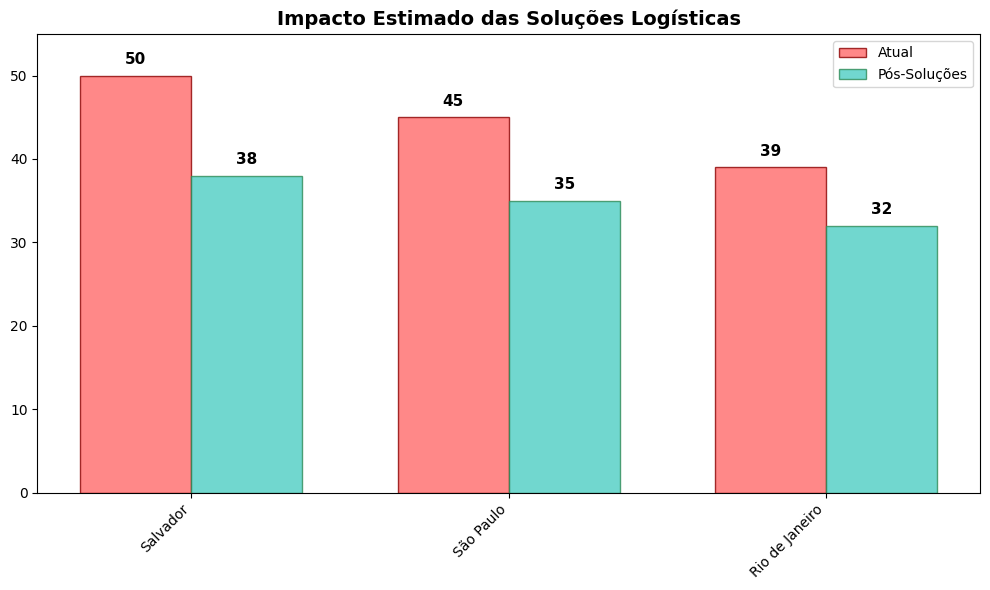

In [ ]:
solucao_df = pd.DataFrame({
    "Cidade": ["Salvador", "São Paulo", "Rio de Janeiro"],
    "Tempo_Atual": [50, 45, 39],
    "Tempo_Pos_Solucao": [38, 35, 32]  # -24%, -22%, -18%
})

x = np.arange(len(solucao_df))  # [0,1,2]
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, solucao_df["Tempo_Atual"], width, label='Atual',
               color='#FF6B6B', alpha=0.8, edgecolor='darkred')
bars2 = ax.bar(x + width/2, solucao_df["Tempo_Pos_Solucao"], width, label='Pós-Soluções',
               color='#4ECDC4', alpha=0.8, edgecolor='#2E8B57')  # Verde escuro válido

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Impacto Estimado das Soluções Logísticas', fontweight='bold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(solucao_df["Cidade"])
ax.legend()

# Números nas barras
for container in [bars1, bars2]:
    for bar in container:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=11)

ax.set_ylim(0, 55)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('impacto_solucoes_final.png', dpi=400, bbox_inches='tight')
plt.show()


#Gráfico Economia Anual (Donut)



9.360h/mês(atual) / 6.840h/mês(com a solução)

Economia de tempo X Aumenta a quantidade de clientes

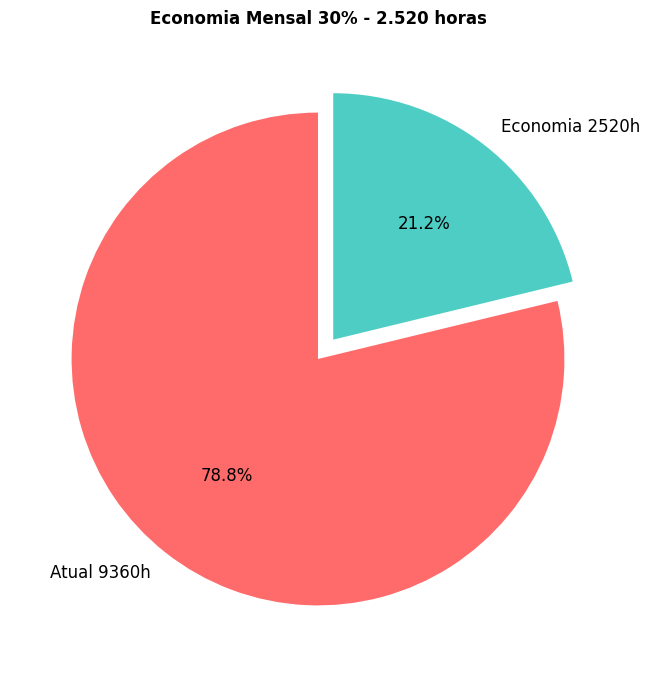

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.pie([9360, 2520], labels=['Atual 9360h', 'Economia 2520h'],
       colors=['#FF6B6B', '#4ECDC4'], autopct='%1.1f%%',
       explode=(0, 0.1), startangle=90, textprops={'fontsize':12})
ax.set_title('Economia Mensal 30% - 2.520 horas', fontweight='bold', pad=20)
plt.savefig('economia_anual.png', dpi=400)


#Gráfico de Impacto Financeiro

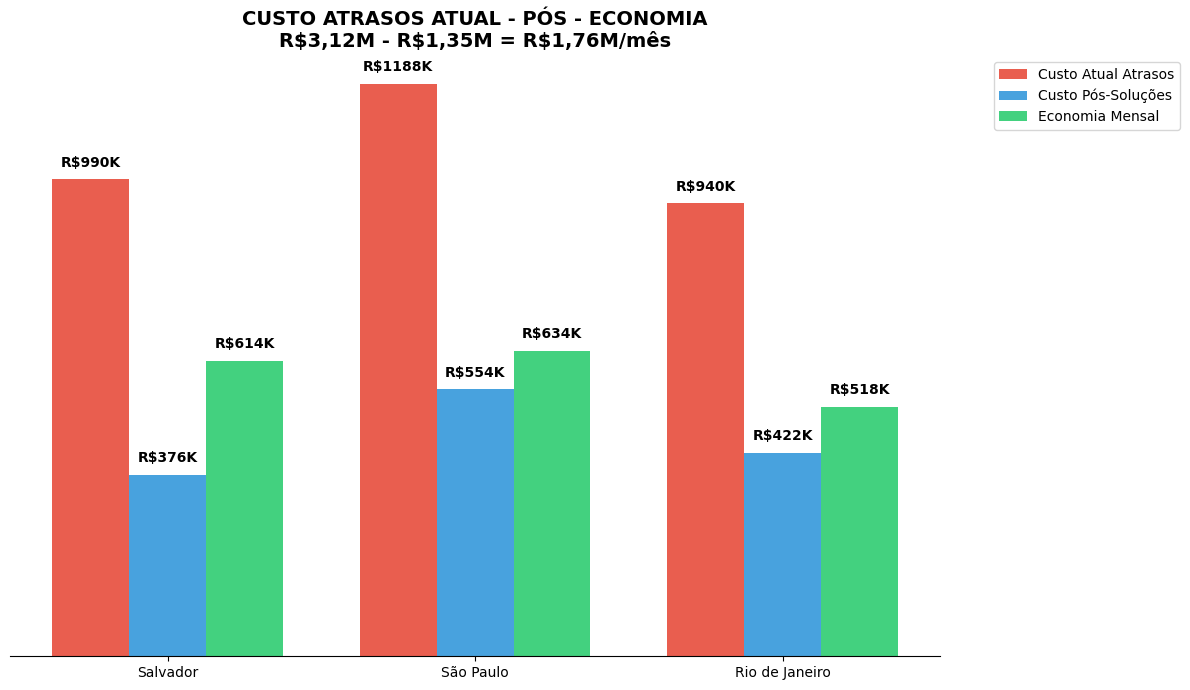

In [ ]:
cidades = ['Salvador', 'São Paulo', 'Rio de Janeiro']
custo_atrasos_atual = [990000, 1188000, 940500]
custo_atrasos_pos = [376200, 554400, 422400]
economia_atrasos = [613800, 633600, 518100]

x = np.arange(len(cidades))
width = 0.25

fig, ax1 = plt.subplots(figsize=(12, 7))

ax1.bar(x - width, custo_atrasos_atual, width, label='Custo Atual Atrasos', color='#E74C3C', alpha=0.9)
ax1.bar(x, custo_atrasos_pos, width, label='Custo Pós-Soluções', color='#3498DB', alpha=0.9)
ax1.bar(x + width, economia_atrasos, width, label='Economia Mensal', color='#2ECC71', alpha=0.9)

ax1.set_xlabel('')
ax1.set_title('CUSTO ATRASOS ATUAL - PÓS - ECONOMIA\nR$3,12M - R$1,35M = R$1,76M/mês', fontweight='bold', fontsize=14)

ax1.set_xticks(x)
ax1.set_xticklabels(cidades)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


for i, valores in enumerate(zip(custo_atrasos_atual, custo_atrasos_pos, economia_atrasos)):
    for j, (v, pos) in enumerate(zip(valores, [-width, 0, width])):
        ax1.text(i + pos, v + 20000, f'R${v/1000:.0f}K',
                 ha='center', va='bottom', fontweight='bold', fontsize=10)

# EIXO Y INVISÍVEL
ax1.set_yticks([])
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig('custos_economia.png', dpi=400, bbox_inches='tight')
plt.show()

